# TASK 2: LINEAR REGRESSION


In this task we eill try to predict the percentage the student will obtain based on the number of hours they study.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("data imported")
data

data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Lets now try to plot our datato find some pattern

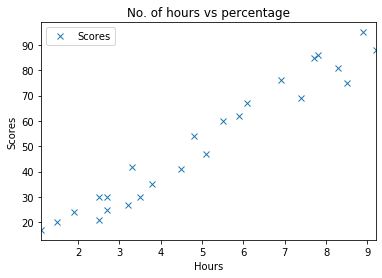

In [9]:
data.plot(x='Hours', y='Scores', style='x')
plt.title("No. of hours vs percentage")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

We can now clearly see a pattern. It is showing positive linear correlation.

# Preaparing the data

In [17]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now lets split the data in testing and training set using test_train_split() function from sklearn library. We will use 20% of data for the test set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Training our model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("model successfully trained")

model successfully trained


Now let us try to plot how our model is fitted in the data

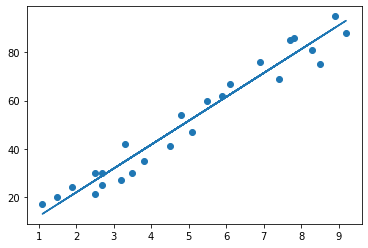

In [22]:
m = model.coef_
c = model.intercept_
#our line will be of form y = mx + c
line = m*x + c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

So, we can see model is pretty good. Let us now make some predictions.

# Predictions

In [23]:
y_pred = model.predict(X_test)
df = pd.DataFrame({"actual values:":y_test , "predicted values:":y_pred})
df

,actual values:,predicted values:
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We can now make predictions for some random time. Lets try to give it some input ourself.

In [26]:
hr = float(input())


9.25


In [39]:

my_pred = model.predict([[hr],])
print("predicted score:", my_pred[0])

predicted score: 93.69173248737538


# Error in the predictions

Let us check how much error is there in our predictions. There our many methods for this. We will be using MAE method that is mean absolute error

In [40]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test,y_pred))

MAE 4.183859899002975
